In [13]:
import os, json
import pandas as pd

import utils

%matplotlib inline

# make time series to dataframe

In [15]:
nums_folder = "./data/sec"
num_prefix = "numbers_sec-numbers"

df_nums = utils.load_folder_csv(nums_folder, prefix=num_prefix)
len(df_nums)

C:\Users\lewen.zhao\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\lewen.zhao\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


8551163

In [4]:
tags = json.loads(open('freq_tags.json', 'r').read())
len(tags)

208

In [16]:
df_quarters = df_nums[df_nums['number_of_quarters']==1]
len(df_quarters)

1601166

In [7]:
df_quarters.head()

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
284570,0001193125-10-183206,REGENCY ENERGY PARTNERS LP,WeightedAverageLimitedPartnershipUnitsOutstanding,us-gaap/2009,20100531,1,shares,0x17f4a4e6a80ac7bf651431403c112a09,0,9.283222e+07,NaN,0,1,NaN,0.40822,6.0,0
284571,0001193125-10-183206,REGENCY ENERGY PARTNERS LP,DistributionsPerLimitedPartnershipUnitOutstanding,us-gaap/2009,20100531,1,USD,0x436786f133a4fc91c4c64d86b156b4a1,0,4.450000e-01,NaN,0,2,NaN,0.40822,6.0,3
284572,0001193125-10-183206,REGENCY ENERGY PARTNERS LP,NetIncomeLossPerOutstandingLimitedPartnershipUnit,us-gaap/2009,20100531,1,USD,0x17f4a4e6a80ac7bf651431403c112a09,0,-7.000000e-02,NaN,0,1,NaN,0.40822,6.0,2
284573,0001193125-10-183206,REGENCY ENERGY PARTNERS LP,GainLossOnDispositionOfAssets,us-gaap/2009,20100531,1,USD,0x17f4a4e6a80ac7bf651431403c112a09,0,-1.900000e+04,NaN,0,1,NaN,0.40822,6.0,-3
284574,0001193125-10-183206,REGENCY ENERGY PARTNERS LP,NaturalGasLiquidsSalesRevenues,0001193125-10-183206,20100531,1,USD,0x17f4a4e6a80ac7bf651431403c112a09,0,6.903300e+07,NaN,0,1,NaN,0.40822,6.0,-3


In [17]:
df_quarters_tag = df_quarters[df_quarters['measure_tag'].isin(tags)]
len(df_quarters_tag)

794905

In [9]:
df_quarters_tag[df_quarters_tag['submission_number']=="0001193125-10-183206"].groupby('period_end_date')

In [18]:
def split_date_int(row, date_col="period_end_date"):
    dt = row[date_col]
    day = dt%100
    month = dt/100%100
    year = dt/10000
    
    return pd.Series({'year':year, 'month':month, 'day':day})

In [19]:
df_date = df_quarters_tag.apply(split_date_int, axis=1)
df_date.describe()

,day,month,year
count,794905.000000,794905.000000,794905.000000
mean,30.387833,6.118460,2012.197054
std,0.521786,2.464229,1.937250
min,28.000000,1.310000,1993.123100
25%,30.000000,3.310000,2011.033100
50%,30.000000,6.300000,2012.033100
75%,31.000000,7.310000,2014.033100
max,31.000000,12.310000,2019.033100


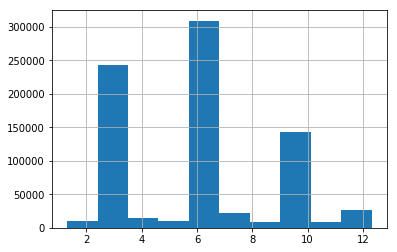

In [20]:
df_date['month'].hist()